<a href="https://colab.research.google.com/github/uzeziogho/Kaggle-competitions/blob/main/Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import average_precision_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
MHpd= pd.read_csv('/content/train.csv')

In [12]:
MHpd.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [15]:
# Handling Null Values
# Separate numerical and categorical features
num_features = MHpd.select_dtypes(include=['float64', 'int64']).columns
cat_features = MHpd.select_dtypes(include=['object']).columns

In [16]:
# Impute missing values
num_imputer = SimpleImputer(strategy='median')
MHpd[num_features] = num_imputer.fit_transform(MHpd[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
MHpd[cat_features] = cat_imputer.fit_transform(MHpd[cat_features])

In [17]:
MHpd.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,3.0,5.0,7.77,3.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1.0,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,7.77,3.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2.0,Yuvraj,Male,33.0,Visakhapatnam,Student,Teacher,5.0,3.0,8.97,2.0,3.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3.0,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,7.77,3.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4.0,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,7.77,3.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0


<ipython-input-24-17726db9d220>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Dep_counts.index, y=Dep_counts.values, palette='Set1')


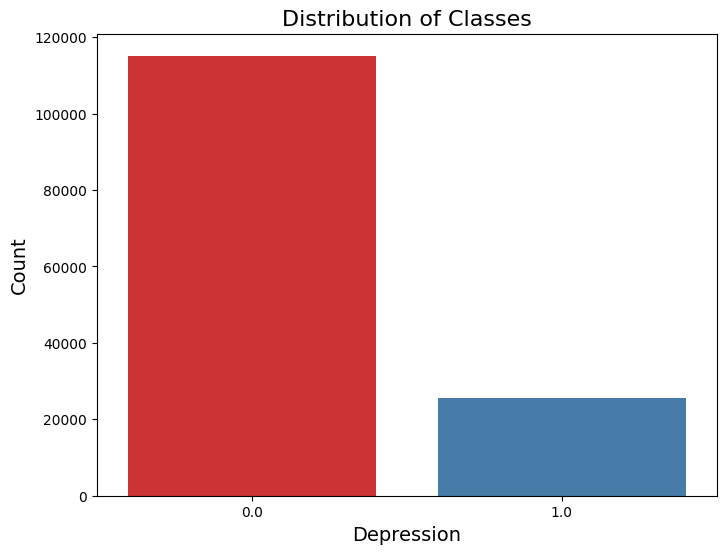

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(MHpd)

# Assuming 'df' is your DataFrame with the 'Class' column

# Count the occurrences of each class
Dep_counts = df['Depression'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=Dep_counts.index, y=Dep_counts.values, palette='Set1')

# Add labels and a title
plt.xlabel('Depression', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Classes', fontsize=16)

# Show the plot
plt.show()

In [19]:
y=MHpd['Depression'].map({'Yes':1,'No':0})